# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método del Trapecio

### Ejercicio 13.- Calculamos aproximadamente la integral $\displaystyle \int_{0}^{1} \sqrt{3+\cos(x^3)} \, dx$ mediante el Método del Trapecio, con error absoluto menor que $10^{-3}$. Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.

SOLUCIÓN

Definimos la función $f(x)=\sqrt{3+\cos(x^3)}$. 

In [1]:
f(x)=sqrt(cos(x^3)+3)#definimos f
f

x |--> sqrt(cos(x^3) + 3)

In [2]:
a=0;b=1;#definimos el intervalo

Sabemos que <strong>la cota del error para el Método del Trapecio</strong> es la siguiente:
$$\displaystyle \left|{\rm Trapecio}_n(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M,$$
donde $M$ es una constante que cumpla $|f''(x)|\leq M$ para todo $x\in [a,b]$. 

Busquemos gráficamente $M$ y luego encontraremos $n$.

<p>Veamos qué área queremos calcular:</p>

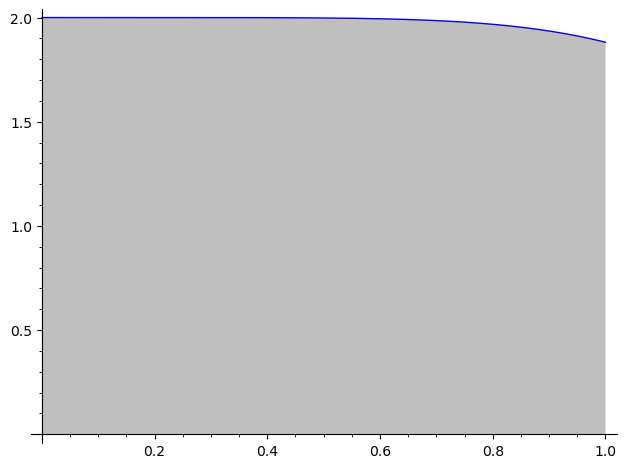

In [3]:
plot(f,x,a,b,fill=true)

Busquemos el $M$. Para eso, calculamos la segunda derivada y la acotamos.

In [4]:
show(derivative(f(x),x,2))

-9/2*x^4*cos(x^3)/sqrt(cos(x^3) + 3) - 9/4*x^4*sin(x^3)^2/(cos(x^3) + 3)^(3/2) - 3*x*sin(x^3)/sqrt(cos(x^3) + 3)

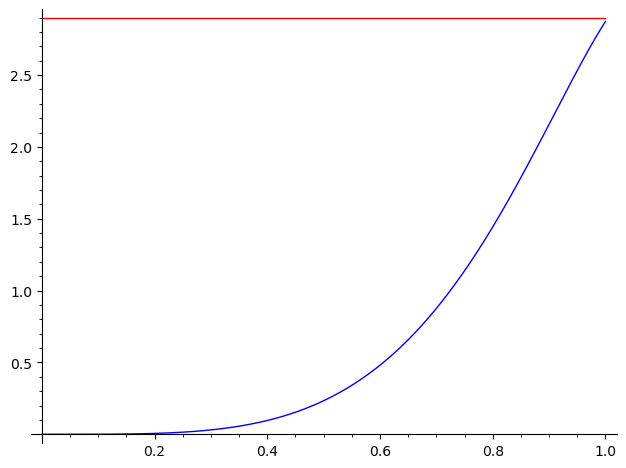

In [5]:
plot(abs(derivative(f(x),x,2)),(x,a,b))+plot(2.9,a,b,color='red')

 Para determinar el número $n$ de subintervalos que debemos utilizar para alcanzar la precisión deseada, buscamos un $n$ que cumpla
$$\dfrac{(b-a)^3}{12\cdot n^2}\cdot M \leq \epsilon  \Longleftrightarrow \dfrac{1}{n^2} \leq \dfrac{12·\epsilon}{M·(b-a)^3}  \Longleftrightarrow n^2  \geq \dfrac{M·(b-a)^3}{12·\epsilon}  \Longleftrightarrow n  \geq \sqrt{\dfrac{M·(b-a)^3}{12\cdot \epsilon}}$$
Tomemos $M=2.9$ y $\epsilon=10^{-3}$.

In [6]:
M=2.9;
epsilon=10^(-3);

In [7]:
numerical_approx( sqrt((b-a)^3*M/(12*epsilon))) #=> n=16

15.5456317551480

También se puede hacer iterando hasta encontrar el $n$ adecuado:

In [8]:
n=1
while (b-a)^3*M/(12*n^2)>epsilon:
    n=n+1

In [9]:
n

16

<p>Por tanto, vamos a aplicar el Método del Trapecio con $n=16$ subintervalos.</p>
<p>Calculamos la aproximación:</p>

In [10]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
show(X) # X's en los que dividimos el intervalo [a,b]

[0,
 1/16,
 1/8,
 3/16,
 1/4,
 5/16,
 3/8,
 7/16,
 1/2,
 9/16,
 5/8,
 11/16,
 3/4,
 13/16,
 7/8,
 15/16,
 1]

In [11]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
numerical_approx( trapecio)

1.98242852552029

Conclusión: ${\rm Trapecio}_{16}(f)=1.98242852552029$ es una aproximación de $\displaystyle \int_0^1 f(x) \, dx$ con error absoluto menor que $10^{-3}$.

Comparamos el resultado con el que nos da SAGE, para eso usamos la sentencia "numerical_integral".


In [12]:
numerical_integral(f,a,b)[0]

1.9826467624746877

In [13]:
abs(numerical_integral(f,a,b)[0]-trapecio).n() < 10^(-3) 
#comprobemos el resultado

True

Veamos gráficamente lo qué hemos calculado con el método del TRAPECIO.

In [14]:
XY=[(X[j],f(X[j])) for j in range(0,n+1)]; 
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)
L=piecewise([[(X[j],X[j+1]),r(X[j],X[j+1],x)] for j in srange(0,len(X)-1)],var=x);

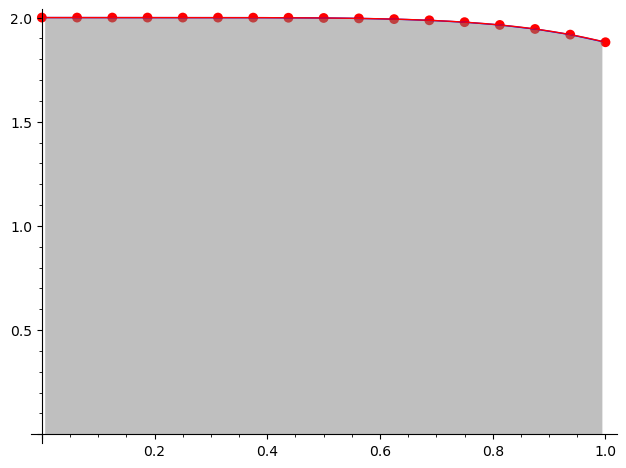

In [15]:
plot( L(x),(x,a,b),fill=true)+point2d(XY,size=50,color='red')+plot(f,a,b,color='red')